Analysis of radiative data at station 'ACME'

In [2]:
# importing necessary modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# downward shortwave radiation at surface at station 'ACME: dswrfs'
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME: dlwrfs'
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME: uswrfs'
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME: ulwrfs'
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF\\ulwrf_station.csv", header=None)

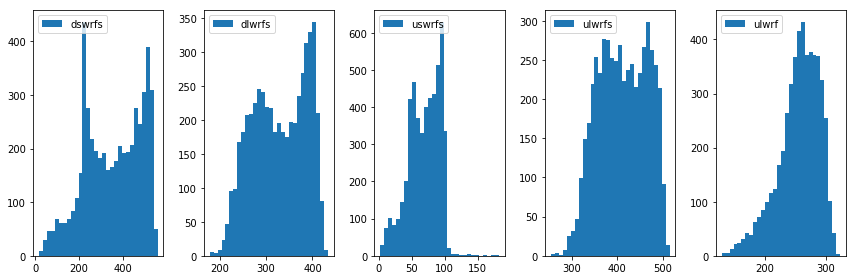

Summary statistics of radiative flux data:
            dswrfs       dlwrfs       uswrfs       ulwrfs        ulwrf
count  5113.000000  5113.000000  5113.000000  5113.000000  5113.000000
mean    350.834975   329.050520    68.970873   410.980022   255.683397
std     130.377819    57.818926    23.835364    52.774717    33.947501
min      16.153026   178.512698     2.244599   255.119225   129.706740
25%     239.426658   280.683939    51.539085   368.233172   237.599926
50%     359.179911   330.865447    71.610417   410.400055   260.127657
75%     471.298605   383.003791    89.218567   457.961941   281.387971
max     559.542829   433.824405   182.335638   514.294877   323.332986


In [5]:
# Histograms of all the flux to see frequency distribution from 14 years of data

fig, axes = plt.subplots(nrows=1, ncols=5)
ax0, ax1, ax2, ax3, ax4 = axes.flatten()
n_bins = 30
ax0.hist(dswrfs[0], n_bins, histtype='bar', label='dswrfs')
ax0.legend(loc='upper left')

ax1.hist(dlwrfs[0], n_bins, histtype='bar', label='dlwrfs')
ax1.legend(loc='upper left')

ax2.hist(uswrfs[0], n_bins, histtype='bar', label='uswrfs')
ax2.legend(loc='upper left')

ax3.hist(ulwrfs[0], n_bins, histtype='bar', label='ulwrfs')
ax3.legend(loc='upper left')

ax4.hist(ulwrf[0], n_bins, histtype='bar', label='ulwrf')
ax4.legend(loc='upper left')

fig.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = [12,4]

# Summary statistics of temperature data
print('Summary statistics of radiative flux data:')
dswrfs_des = dswrfs.describe()
dlwrfs_des = dlwrfs.describe()
uswrfs_des = uswrfs.describe()
ulwrfs_des = ulwrfs.describe()
ulwrf_des = ulwrf.describe()
rf_stat = pd.concat([dswrfs_des, dlwrfs_des, uswrfs_des, ulwrfs_des, ulwrf_des], axis=1)
rf_stat.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
print(rf_stat)


Comment: downwards shortwave has higher energy relative to downward longwave energy. Upward shortwave energy is a tiny fraction as the reemitted energy is primarilly longwave.

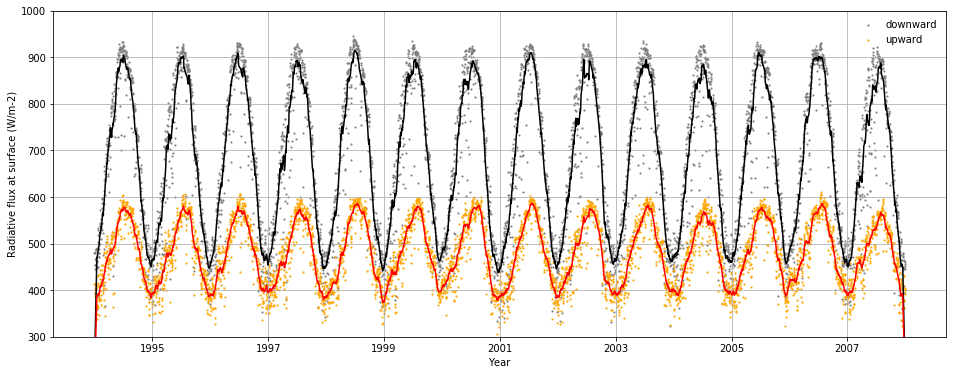

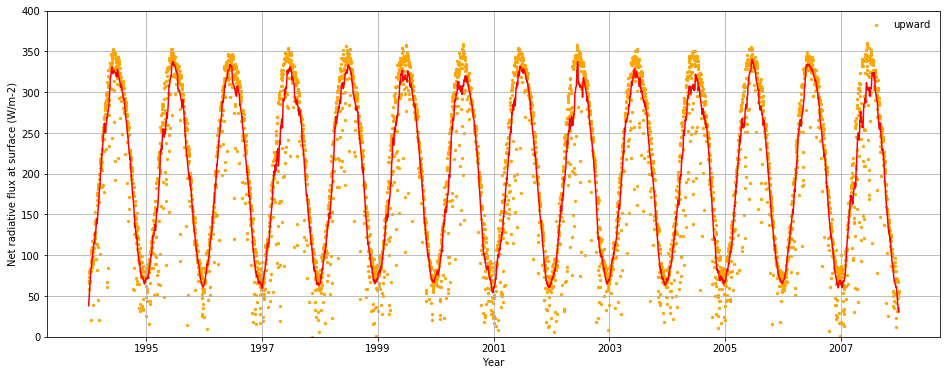

In [59]:
#total downward radiation flux at surface at station 'ACME: drf'
down = dswrfs + dlwrfs
#total upward radiation flux at surface at station 'ACME: urf'
up = uswrfs + ulwrfs

# Net radiation at surface = total dowanward radiation - total upward radiation : rs
rs = down - up
#print(rs)
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]
# plot time series of upward and downward radiation

# esttimating the noving average
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window,'same')

x = dates
y = down[0].values
plt.scatter(x, y, s=5, marker='.', color='gray', label='downward')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='black')

y = up[0].values
plt.scatter(x, y, s=5, marker='.', color='orange', label='upward')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='red')

plt.ylim(300,1000)
plt.xlabel('Year')
plt.ylabel('Radiative flux at surface (W/m-2)')
#plt.xticks(rotation=45)
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [16,6]
plt.grid(True)
plt.show()

# plot net radiation at surface
y = rs[0].values
plt.scatter(x, y, s=5, color='orange', label='upward')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='red')

plt.ylim(0,400)
plt.xlabel('Year')
plt.ylabel('Net radiative flux at surface (W/m-2)')
#plt.xticks(rotation=45)
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [16,6]
plt.grid(True)
plt.show()
 


Comment: We have radiative flux for downward and upward radiation. We want to examine how these are related. First they are averaged over 14 years ( jan 1 from all 14 years and so on). 

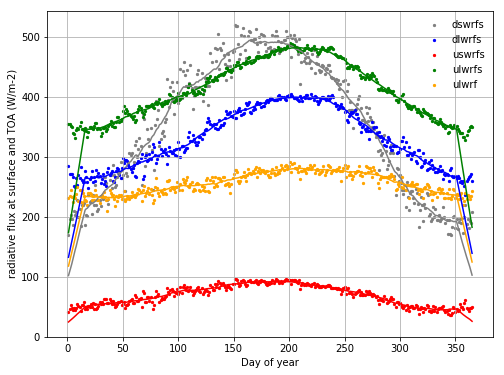

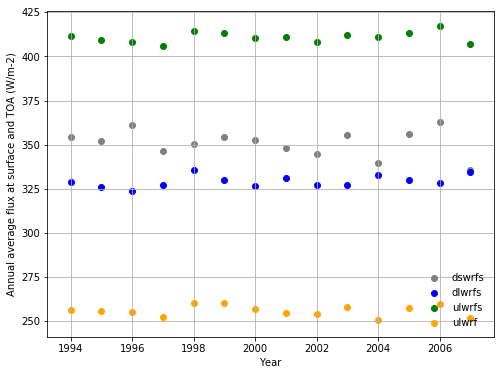

In [55]:
# for all radiative type
file = [dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf]
avg_rf = pd.DataFrame()
annual_rf = pd.DataFrame()
for j in range(5):
    rf = file[j]
    #Averaging radiative flux over each day in the year: avg_rf
    # Annual average of flux: annual_rf
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = rf[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = rf[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_rf = pd.concat([avg_rf, avg_yr], axis=1)
    annual_rf = pd.concat([annual_rf, annual_avg], axis=1)
avg_rf.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
annual_rf.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
#print(annual_rf)

# plotting seasonal variation in radiative flux
days = list(range(1, 366))

x = days
y = avg_rf['dswrfs'].values
plt.scatter(x, y, s=5, color='gray', label='dswrfs')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='gray')

y = avg_rf['dlwrfs'].values
plt.scatter(x, y, s=5, color='blue', label='dlwrfs')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='blue')

y = avg_rf['uswrfs'].values
plt.scatter(x, y, s=5, color='red', label='uswrfs')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='red')

y = avg_rf['ulwrfs'].values
plt.scatter(x, y, s=5, color='green', label='ulwrfs')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='green')

y = avg_rf['ulwrf'].values
plt.scatter(x, y, s=5, color='orange', label='ulwrf')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='orange')

plt.xlabel('Day of year')
plt.ylabel('radiative flux at surface and TOA (W/m-2)')
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
#plt.figure(figsize=(3,4))
plt.rcParams["figure.figsize"] = [8,6]
plt.grid(True)
plt.show()


# Any trend in annual average values?? Not apperant from the plot
year = list(range(1994, 2008))
plt.scatter(year, annual_rf['dswrfs'], color='gray', label='dswrfs')
plt.scatter(year, annual_rf['dlwrfs'], color='blue', label='dlwrfs')
#plt.scatter(year, annual_rf['uswrfs'], color='red', label='uswrfs')
plt.scatter(year, annual_rf['ulwrfs'], color='green', label='ulwrfs')
plt.scatter(year, annual_rf['ulwrf'], color='orange', label='ulwrf')
plt.xlabel('Year')
plt.ylabel('Annual average flux at surface and TOA (W/m-2)')
leg = plt.legend(loc='lower right')
leg.draw_frame(False)
plt.grid(True)
plt.show()


Comment:
Shortwave radiation (visible light) contains a lot of energy; longwave radiation (infrared light) contains less energy than shortwave radiation (shortwave radiation has a shorter wavelength than longwave radation). Solar energy enters our atmosphere as shortwave radiation in the form of ultraviolet (UV) rays (the ones that give us sunburn) and visible light.  The sun emits shortwave radiation because it is extremely hot and has a lot of energy to give off.  Once in the Earth’s atmosphere, clouds and the surface absorb the solar energy.  The ground heats up and re-emits energy as longwave radiation in the form of infrared rays.  Earth emits longwave radiation because Earth is cooler than the sun and has less energy available to give off. 

All of them have seasonality: higher in summer and lower in winter. However, the peaks of short and long waves correspond to different time of year. That means that peak in re-emitted energy is off-set from the peak of direct emitted solar energy. 


Index(['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf'], dtype='object')


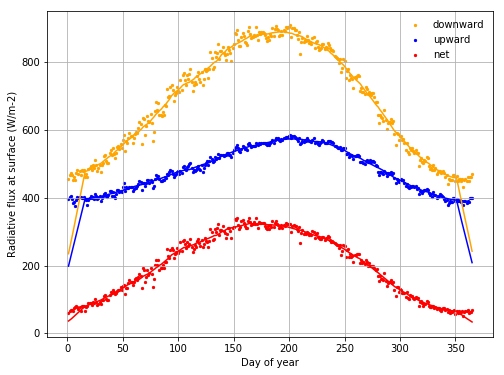

In [51]:
# Plotting upward, downward and net radiation at surface
print(avg_rf.columns)
dn = avg_rf['dswrfs'] + avg_rf['dlwrfs']
up = avg_rf['uswrfs'] + avg_rf['ulwrfs']

# Net radiation at surface, downward flux - upward flux at surface: nrs
nrs = dn - up
x = days
y = dn.values
plt.scatter(x, y, s=5, color='orange', label='downward')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='orange')

y = up.values
plt.scatter(x, y, s=5, color='blue', label='upward')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='blue')

y = nrs.values
plt.scatter(x, y, s=5, color='red', label='net')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='red')


plt.xlabel('Day of year')
plt.ylabel('Radiative flux at surface (W/m-2)')
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
#plt.rcParams["figure.figsize"] = [8,6]
plt.grid(True)
plt.show()


Comment: Both the downward and upward flux has seasonality: with higher flux in summer and lower flux in winter. That is obvious as during summer more radiative flux is received at surface. The upward flux depends on how heated the surface becomes. Also there is seasonality in the net flux at surface. The peak of the dowanward and upward flux has a time lag as seen before.

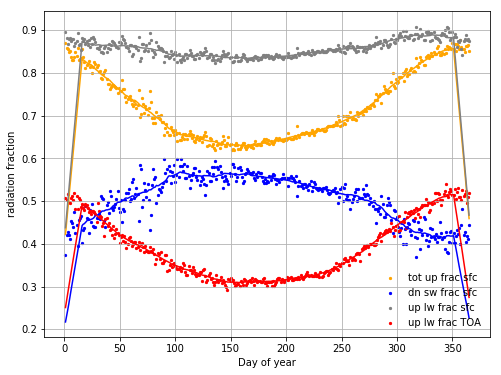

In [50]:
# what fraction of downward radiation is reemitted from surface? ans: upward radiation / downward radiation
up_frac = up/dn

# what fraction of incomng radiation is shortwave and what fraction of upward radiation is long wave?
ds_by_dn = avg_rf['dswrfs']/dn
ul_by_up = avg_rf['ulwrfs']/up

# what fraction of incoming at surface goes back to the top of the atmosphere? ulwrfs/ulwrf
fr_atm_s = avg_rf['ulwrf']/dn

# plotting them

y = up_frac.values
plt.scatter(x, y, s=5, color='orange', label='tot up frac sfc')
y_av = movingaverage(y, 30)
plt.plot(days, y_av, color='orange')

y = ds_by_dn.values
plt.scatter(x, y, s=5, color='blue', label='dn sw frac sfc')
y_av = movingaverage(y, 30)
plt.plot(days, y_av, color='blue')

y = ul_by_up.values
plt.scatter(x, y, s=5, color='gray', label='up lw frac sfc')
y_av = movingaverage(y, 30)
plt.plot(days, y_av, color='gray')

y = fr_atm_s.values
plt.scatter(x, y, s=5, color='red', label='up lw frac TOA')
y_av = movingaverage(y, 30)
plt.plot(days, y_av, color='red')

leg = plt.legend(loc='lower right')
leg.draw_frame(False)
plt.xlabel('Day of year')
plt.ylabel('radiation fraction')
plt.grid(True)
plt.show()


Comment: While the downward radiation (in blue) has significant amount of longwave radiation (probably due to presence of atmospheric particle, cloud), upward radiation (in gray) almost entirely due to longwave radiation. Upward ~ synnonymous to longwave radiation. The fraction of radiation at the top of atmosphere is high in winter and low in summer. In summer more energy is retained near the surface.